# Lab 2.3: Sentiment Analysis of Airline Tweets

For this dataset of airline realted tweets, we will try to build a model to do sentiment analysis of text and determine if the message is positive or negative. You will clean the data then create a logistic regression model to classify reponses as positive or negative. 

**Rubric**

- 6 pts - Contains all required components and uses professional language
- 5 pts - Contains all required components, but uses unprofessional language, formating, etc.
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit


## Preprocess and Clean the Data

1. Import the following: 
```
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
```

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

2. Load the dataset with `read_csv()` and create your dataframe.

In [97]:
df = pd.read_csv("airline_tweet.csv")

3. List the colummns in the dataset.

In [98]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

4. Remove all columns except `airline_sentiment`,`text`,and `airline`.

In [99]:
df = df[['airline_sentiment','text','airline']]
df.head()

,airline_sentiment,text,airline
0,neutral,@VirginAmerica What @dhepburn said.,Virgin America
1,positive,@VirginAmerica plus you've added commercials t...,Virgin America
2,neutral,@VirginAmerica I didn't today... Must mean I n...,Virgin America
3,negative,@VirginAmerica it's really aggressive to blast...,Virgin America
4,negative,@VirginAmerica and it's a really big bad thing...,Virgin America


5. Check for null values and remove any rows with nulls.

In [100]:
df.isnull().sum()

airline_sentiment    0
text                 0
airline              0
dtype: int64

6. Check the datatypes of each column.

In [101]:
df.dtypes

airline_sentiment    object
text                 object
airline              object
dtype: object

7. What values are in `airline_sentiment`? We want the column to have numerical values 0, -1, or 1 to represent tweets which are neutral, negative, and positive respectively. 

In [102]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [103]:
df['airline_sentiment']= df['airline_sentiment'].replace("positive",1)
df['airline_sentiment']= df['airline_sentiment'].replace("neutral",0)
df['airline_sentiment']= df['airline_sentiment'].replace("negative",-1)

df = df.dropna()

/tmp/ipykernel_488538/658294988.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['airline_sentiment']= df['airline_sentiment'].replace("negative",-1)


In [104]:
df['airline_sentiment'].unique()

array([ 0,  1, -1])

7. Now make sure `airline_sentiment` is a numerical datatype. If not, translate it to numbers.

In [105]:
df.dtypes

airline_sentiment     int64
text                 object
airline              object
dtype: object

8. What values are in `airline`?

In [106]:
df['airline'].value_counts()

airline
United            3822
US Airways        2912
American          2755
Southwest         2418
Delta             2222
Virgin America     501
?                    4
american             3
southwest            2
us airways           1
Name: count, dtype: int64

9. Fix the incorrect airline titles.

In [107]:
df['airline'] = df['airline'].replace('american', 'American')
df['airline'] = df['airline'].replace('southwest', 'Southwest')
df['airline'] = df['airline'].replace('us airways', 'US Airways')

10. Now, check the value counts for `airline`. Did you correct the mistakes? 

In [108]:
df['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2758
Southwest         2420
Delta             2222
Virgin America     501
?                    4
Name: count, dtype: int64

11. Now drop all of the rows with `?`'s in the `airline` column. 

In [109]:
import numpy as np
df['airline'] = df['airline'].replace('?', np.nan)
df.dropna()
df['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2758
Southwest         2420
Delta             2222
Virgin America     501
Name: count, dtype: int64

12. Create a graph that shows the number of negative, positive, and neutral tweets by airline. You will want to use **groups**  and the `groupby()` function to separate the counts by airline. Then `.size()` to get the value counts of each sentiment and `unstack()` to combine the counts. This should allow you to create a new Dataframe and you can use the built in pandas function `.plot()` to create a grouped plot.`plt.title()` and all of the other `plt` functions that modify your graph will still work.  

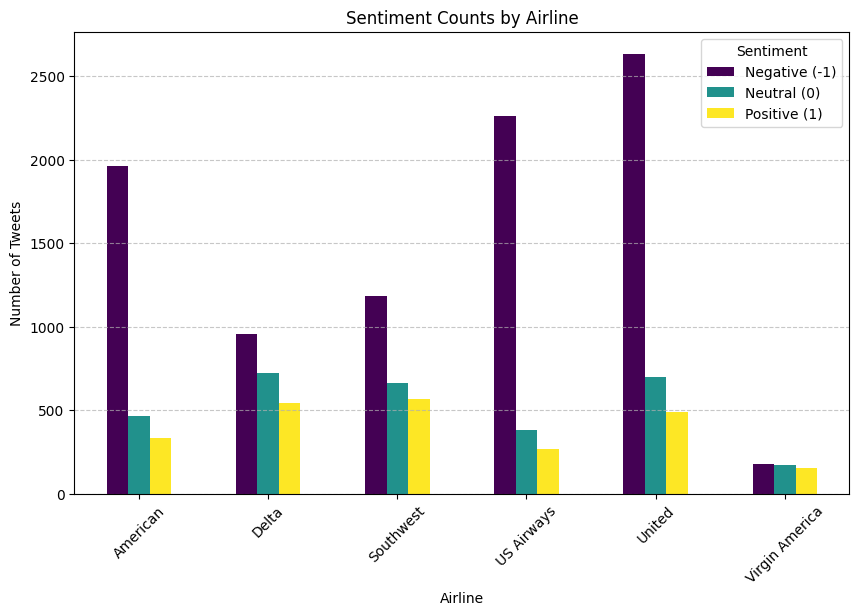

In [110]:
import matplotlib.pyplot as plt

# Group by airline and sentiment, then count occurrences
sentiment_counts = df.groupby(["airline", "airline_sentiment"]).size().unstack(fill_value=0)

# Plot the grouped bar chart
sentiment_counts.plot(kind="bar", figsize=(10, 6), colormap="viridis")

plt.title("Sentiment Counts by Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment", labels=["Negative (-1)", "Neutral (0)", "Positive (1)"])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## Prepare Training and Testing Sets

13. Using `train_test_split()` create a training and testing sets with the `text` column as `x` and `airline_sentiment` as `y`. Split the dataset with 80% training and 20% testing. Save the results as `X_train`, `X_test`, `y_train`, and `y_test`.

In [111]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.2, random_state=42)

14. Now, we will use the `TfidfVectorizer` class to transform all of the words into word vectors(columns of numbers that represent the text). Now, our text will be all **numerical** features instead. 

```
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
```

In [112]:
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Train a Sentiment Classifier with Logisitic Regression

We are going to train a **LogisticRegression** model to classify our tweets. 
11. Define a `lr_model` with the constructor `LogisiticRegression()`. 

In [113]:
lr_model = LogisticRegression()

15. Use `fit()` with `X_train_tfidf` and `y_train` to train your model

In [114]:
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

16. Use `predict()` on your test set(`X_test_tfidf`) and save the results as a new variable.

In [115]:
y_pred_lr = lr_model.predict(X_test_tfidf)

17. Compare the true test set results(`y_test`) with the predicted values you just calculated using the method `accuracy_score()`. Save this as a new variable and print the results. This will show you how accurate your model is with the testing set.

In [116]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Testing Accuracy: {accuracy_lr:.2f}")

Logistic Regression Testing Accuracy: 0.80


18. Compare the accuracy score of the testing set you just calculated to the accuracy score of the training set to check for potential *overfitting* or *underfitting* of our model.

In [117]:
y_pred_lr_train = lr_model.predict(X_train_tfidf)
accuracy_lr = accuracy_score(y_train, y_pred_lr_train)
print(f"Logistic Regression Training Accuracy: {accuracy_lr:.2f}")

Logistic Regression Training Accuracy: 0.86


19. Write your own testing set of 10 sample tweet. Modify the code below to test the accuracy of your program with your sample testing set. 

```
def predict_sentiment(text, model, vectorizer):
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)[0]
    return "Positive" if prediction == 1 else "Negative"

new_text = "I love flying United!"
print(predict_sentiment(new_text, lr_model, vectorizer))
```

In [118]:
def predict_sentiment(text, model, vectorizer):
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)[0]
    return "Positive" if prediction == 1 else "Negative"

new_text = "I love flying United!"
print(predict_sentiment(new_text, lr_model, vectorizer))

Positive
